In [235]:
import cv2
from matplotlib import pyplot as plt
import random
from skimage.util import invert
import numpy as np
from scipy.interpolate import lagrange

In [271]:
def Bezier(A, con, B, t):    
    return (1-t)**2 * A + 2*t*(1-t) * con + t**2 * B

def circle(p):
    x = p[0]
    y = p[1]
    cv2.circle(img, (int(y), int(x)), 5, (255, 0, 0), -1)

[182 170] [180  93]


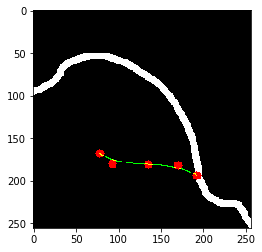

In [291]:
size = 256

img = invert(cv2.imread("river.png"))

ori = []
for x in range(256):
    for y in range(256):
        if img[x][y][0] == 255:
            ori.append(np.array([x, y]))

random.shuffle(ori)
A = ori[0]
B = np.array([random.randrange(size), random.randrange(size)])
mid = (A+B)/2

circle(A)
circle(B)
circle(mid)

con1 = np.array([random.randrange(int(mid[0]),int(A[0])), random.randrange(int(mid[1]),int(A[1]))])
con2 = np.array([random.randrange(int(B[0]), int(mid[0])), random.randrange(int(B[1]), int(mid[1]))])

print(con1, con2)
circle(con1)
circle(con2)

for t in np.linspace(0, 1, 10000):
    tmp1 = Bezier(A, con1, mid, t)
    img[int(tmp1[0])][int(tmp1[1])][1] =  255
    

for t in np.linspace(0, 1, 10000):
    tmp2 = Bezier(mid, con2, B, t)
    img[int(tmp2[0])][int(tmp2[1])][1] =  255
    
    
plt.imshow(img)